# 1. Data Pre-Processing

In [43]:
import os
import re
import json
import pandas as pd
import stanza
from indicnlp.tokenize import indic_tokenize
from indicnlp.normalize.indic_normalize import IndicNormalizerFactory
from collections import defaultdict

# Load Hindi NLP pipeline
# stanza.download("hi")  # Commented out to prevent redundant downloads
nlp = stanza.Pipeline(lang="hi", processors="tokenize")

# Load Hindi stop words from JSON file
stopwords_path = "narrative_classification_HIN/stopwords_hi.json"  # Update with actual path
with open(stopwords_path, "r", encoding="utf-8") as f:
    stop_words = set(json.load(f))

# Function to clean Hindi text
def clean_text(text):
    text = re.sub(r"[\d!@#$%^&*()_+=\[\]{};:'\"\\|,.<>/?`~।]", "", text)  # Added । for removal
    #text = re.sub(r"[\d!@#$%^&*()_+=\[\]{};:'\"\\|,.<>/?`~](?<!।)", "", text)
    text = re.sub(r"\s+", " ", text).strip()  # Remove extra spaces
    normalizer = IndicNormalizerFactory().get_normalizer("hi")
    text = normalizer.normalize(text)  # Normalize text
    return text

# Function to tokenize Hindi text and remove stop words
def tokenize_hindi(text):
    doc = nlp(text)
    tokens = [word.text for sent in doc.sentences for word in sent.words if word.text not in stop_words]
    return " ".join(tokens)

# Load text files
def load_text_files(folder_path, annotation_df):
    text_data = []
    count = 0
    for file in os.listdir(folder_path):
        if file.endswith(".txt"):
            with open(os.path.join(folder_path, file), "r", encoding="utf-8") as f:
                text = f.read()
                cleaned_text = clean_text(text)
                tokenized_text = tokenize_hindi(cleaned_text)
                narrative_info = annotation_df[annotation_df['File_Name'] == file]
                if not narrative_info.empty:
                    narratives = narrative_info.iloc[0]['First_Level_Narrative']
                    sub_narratives = narrative_info.iloc[0]['Second_Level_SubNarrative']
                else:
                    narratives = []
                    sub_narratives = []
                text_data.append({"File_Name": file, "Text": tokenized_text, "Narrative": narratives, "Sub_Narrative": sub_narratives})
                count += 1
    return text_data

if __name__ == "__main__":
    annotation_path = "narrative_classification_HIN/narrative_classification/training_data/hin/subtask-2-annotations.txt"  # Change to actual path
    output_json_path = "processed_annotations.json"
    # Define paths
    text_folder = "narrative_classification_HIN/narrative_classification/training_data/hin/raw_documents"  # Change to actual path
    
    # Load and print first 10 processed tokenized texts
    annotation_df = load_annotation_file(annotation_path)
    text_data = load_text_files(text_folder, annotation_df)
    with open("processed_data.json", "w", encoding="utf-8") as json_file:
        json.dump(text_data, json_file, ensure_ascii=False, indent=4)
    print("Data preprocessing completed and saved as processed_data.json!")

2025-01-28 09:57:38 INFO: Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


2025-01-28 09:57:38 INFO: Downloaded file to /teamspace/studios/this_studio/stanza_resources/resources.json
2025-01-28 09:57:38 INFO: Loading these models for language: hi (Hindi):
| Processor | Package |
-----------------------
| tokenize  | hdtb    |

2025-01-28 09:57:38 INFO: Using device: cpu
2025-01-28 09:57:38 INFO: Loading: tokenize
2025-01-28 09:57:38 INFO: Done loading processors!


Data preprocessing completed and saved as processed_data.json!


# 2. Exploratory Analysis

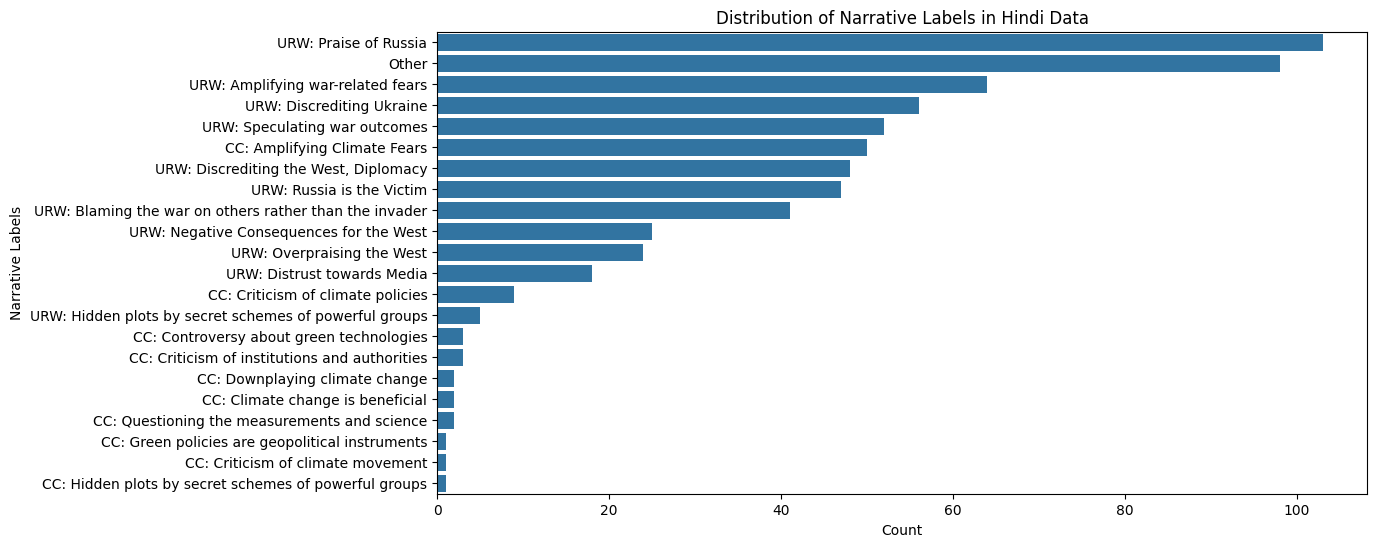

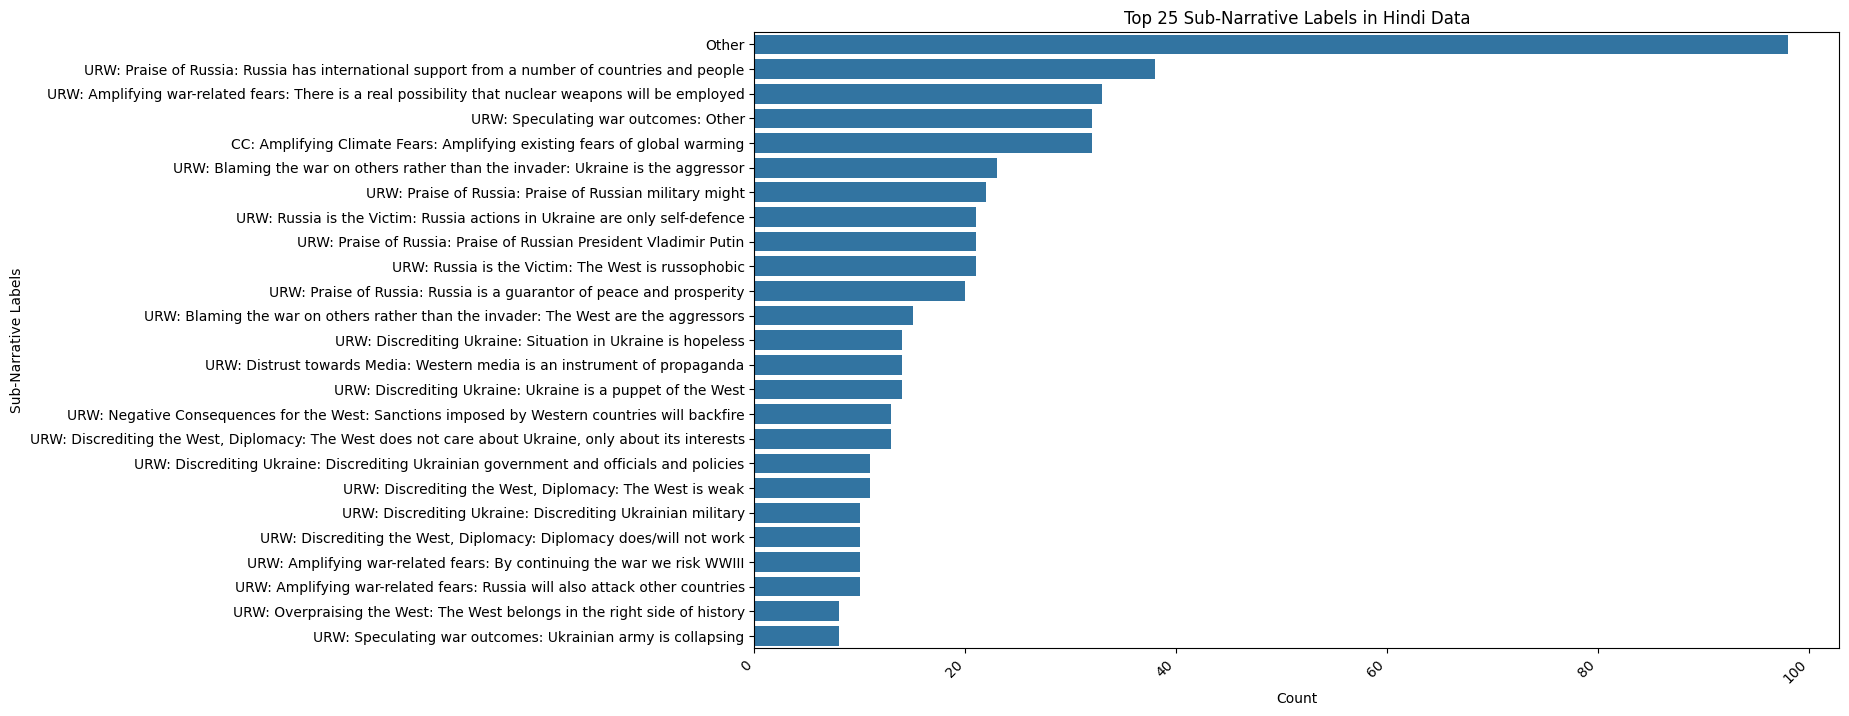

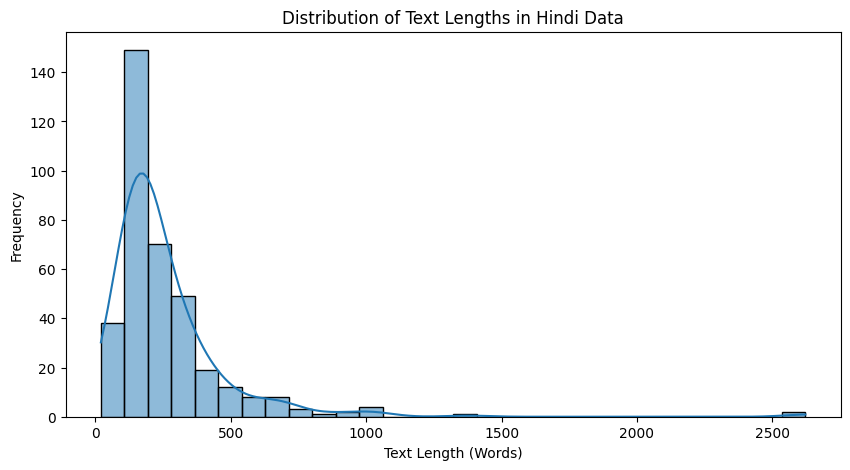

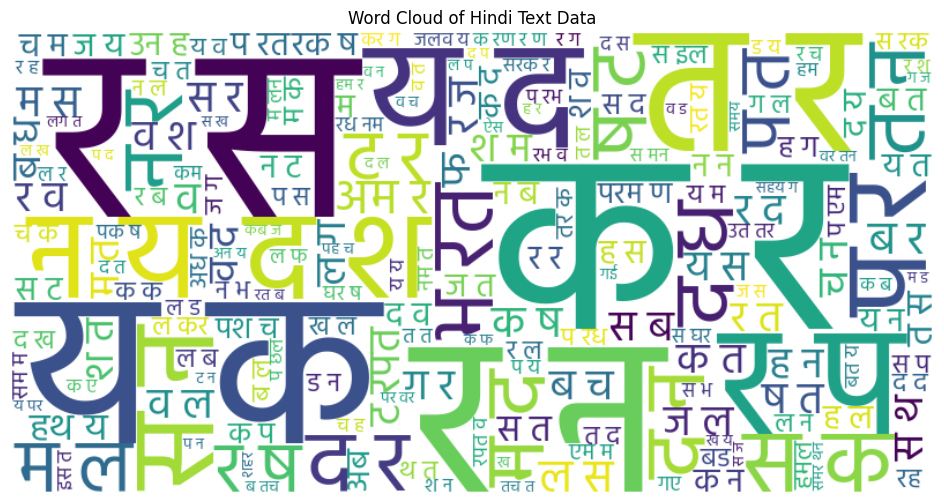

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from indicnlp.tokenize import indic_tokenize
from indicnlp.normalize.indic_normalize import IndicNormalizerFactory
from collections import defaultdict

# Function to perform exploratory data analysis
def exploratory_data_analysis(df_annotations, df_texts):
    """Perform EDA on annotation and text data."""
    # Narrative Label Distribution
    narratives = [item for sublist in df_annotations['Narrative'] for item in sublist]
    plt.figure(figsize=(12, 6))
    sns.countplot(y=pd.Series(narratives), order=pd.Series(narratives).value_counts().index)
    plt.xlabel("Count")
    plt.ylabel("Narrative Labels")
    plt.title("Distribution of Narrative Labels in Hindi Data")
    plt.show()
    
    # Sub-Narrative Label Distribution (Top 25)
    sub_narratives = [item for sublist in df_annotations['Sub_Narrative'] for item in sublist]
    top_sub_narratives = pd.Series(sub_narratives).value_counts().nlargest(25)
    plt.figure(figsize=(14, 8))
    sns.barplot(y=top_sub_narratives.index, x=top_sub_narratives.values)
    plt.xlabel("Count")
    plt.ylabel("Sub-Narrative Labels")
    plt.title("Top 25 Sub-Narrative Labels in Hindi Data")
    plt.xticks(rotation=45, ha='right')
    plt.show()
    
    # Text Length Distribution
    df_texts['Text Length'] = df_texts['Text'].apply(lambda x: len(x.split()))
    plt.figure(figsize=(10, 5))
    sns.histplot(df_texts['Text Length'], bins=30, kde=True)
    plt.xlabel("Text Length (Words)")
    plt.ylabel("Frequency")
    plt.title("Distribution of Text Lengths in Hindi Data")
    plt.show()
    
    # Generate Word Cloud after Removing Stopwords
    text_corpus = ' '.join(df_texts['Text'])
    wordcloud = WordCloud(width=800, height=400, background_color='white', font_path="narrative_classification_HIN/Hind-Regular.ttf").generate(text_corpus)
    plt.figure(figsize=(12, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title("Word Cloud of Hindi Text Data")
    plt.show()

# Load data
annotation_df = pd.read_json("narrative_classification_HIN/processed_data.json", encoding="utf-8")
exploratory_data_analysis(annotation_df, annotation_df)

In [44]:
# Function to tokenize Hindi text and remove stop words
def tokenize_hindi(text):
    doc = nlp(text)
    tokens = [word.text for sent in doc.sentences for word in sent.words if word.text not in stop_words]
    
    # Print tokenized words and their count
    print("Tokenized Words:", tokens)
    print("Total Words Counted:", len(tokens))
    
    return " ".join(tokens)


In [45]:
sample_text = "प्रधानमंत्री नरेंद्र मोदी ने आज जलवायु परिवर्तन पर चर्चा की।"
cleaned_text = clean_text(sample_text)
tokenized_text = tokenize_hindi(cleaned_text)
print("Final Tokenized Output:", tokenized_text)

Tokenized Words: ['प्रधानमंत्री', 'नरेंद्र', 'मोदी', 'आज', 'जलवायु', 'परिवर्तन', 'चर्चा']
Total Words Counted: 7
Final Tokenized Output: प्रधानमंत्री नरेंद्र मोदी आज जलवायु परिवर्तन चर्चा


# 3. Making Label Hierarchy and Encoding Tokens

In [56]:
import os
import re
import json
import pandas as pd
import stanza
import torch
from transformers import AutoModel, AutoTokenizer
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from indicnlp.tokenize import indic_tokenize
from indicnlp.normalize.indic_normalize import IndicNormalizerFactory
from collections import defaultdict

# Load Hindi NLP pipeline
# stanza.download("hi")  # Commented out to prevent redundant downloads
nlp = stanza.Pipeline(lang="hi", processors="tokenize")

# Load Hindi stop words from JSON file
stopwords_path = "narrative_classification_HIN/stopwords_hi.json"  # Update with actual path
with open(stopwords_path, "r", encoding="utf-8") as f:
    stop_words = set(json.load(f))

# Load IndicBERT model and tokenizer for Hindi text encoding
model_name = "ai4bharat/indic-bert"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name)

# Function to clean Hindi text
def clean_text(text):
    text = re.sub(r"[\d!@#$%^&*()_+=\[\]{};:'\"\\|,.<>/?`~]", "", text)  # Remove symbols, numbers
    text = re.sub(r"\s+", " ", text).strip()  # Remove extra spaces
    normalizer = IndicNormalizerFactory().get_normalizer("hi")
    text = normalizer.normalize(text)  # Normalize text
    return text

# Function to tokenize Hindi text and remove stop words
def tokenize_hindi(text):
    doc = nlp(text)
    tokens = [word.text for sent in doc.sentences for word in sent.words if word.text not in stop_words]
    return " ".join(tokens)

# Function to encode Hindi text using IndicBERT
def encode_text(text):
    inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True, max_length=512)
    with torch.no_grad():
        outputs = model(**inputs)
    return outputs.last_hidden_state.mean(dim=1).tolist()[0]

# Load hierarchical label taxonomy
def load_label_hierarchy(annotation_df):
    label_hierarchy = defaultdict(list)
    processed_data = pd.read_json("processed_data.json", encoding="utf-8")
    processed_dict = {row['File_Name']: row for _, row in processed_data.iterrows()}
    
    for _, row in annotation_df.iterrows():
        first_levels = row['Narrative'] if isinstance(row['Narrative'], list) else [row['Narrative']]
        sub_levels = row['Sub_Narrative'] if isinstance(row['Sub_Narrative'], list) else [row['Sub_Narrative']]
        
        for first_level in first_levels:
            if first_level == 'Other':
                label_hierarchy[first_level] = ['Other']
            else:
                if first_level not in label_hierarchy:
                    label_hierarchy[first_level] = []
                label_hierarchy[first_level].extend([sub for sub in sub_levels if first_level in sub])
        first_level = row['Narrative']
        if isinstance(first_level, list):
            first_level = first_level[0]  # Use the first main category
        sub_levels = row['Sub_Narrative']
        if isinstance(sub_levels, list):
            sub_levels = [sub for sub in sub_levels if first_level in sub]  # Keep only relevant subcategories
        if 'Other' in first_level:
            sub_levels = ['Other']  # Ensure only one 'Other' in sub-narrative
            sub_levels = ['Other']
        if first_level not in label_hierarchy:
            label_hierarchy[first_level] = []
            
        label_hierarchy[first_level].extend(sub_levels if isinstance(sub_levels, list) else [sub_levels])
        label_hierarchy[first_level] = list(set(label_hierarchy[first_level]))  # Remove duplicates
    
    for key in label_hierarchy:
        label_hierarchy[key] = list(label_hierarchy[key])  # Convert sets to lists before saving
    with open("label_hierarchy.json", "w", encoding="utf-8") as json_file:
        json.dump(label_hierarchy, json_file, ensure_ascii=False, indent=4)
    
    print("Saved hierarchical labeling in label_hierarchy.json")

if __name__ == "__main__":
    annotation_path = "narrative_classification_HIN/narrative_classification/training_data/hin/subtask-2-annotations.txt"  # Change to actual path
    text_folder = "narrative_classification_HIN/narrative_classification/training_data/hin/raw_documents"  # Change to actual path
    
    # Load data
    annotation_df = pd.read_json("processed_data.json", encoding="utf-8")
    load_label_hierarchy(annotation_df)
    
    # Encode text and save
    annotation_df['Encoded_Text'] = annotation_df['Text'].apply(encode_text)
    annotation_df.to_json("encoded_text_data.json", orient="records", force_ascii=False, indent=4)
    
    print("Text encoding completed and saved as encoded_text_data.json")

2025-01-28 10:24:23 INFO: Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


2025-01-28 10:24:23 INFO: Downloaded file to /teamspace/studios/this_studio/stanza_resources/resources.json
2025-01-28 10:24:23 INFO: Loading these models for language: hi (Hindi):
| Processor | Package |
-----------------------
| tokenize  | hdtb    |

2025-01-28 10:24:23 INFO: Using device: cpu
2025-01-28 10:24:23 INFO: Loading: tokenize
2025-01-28 10:24:23 INFO: Done loading processors!


Saved hierarchical labeling in label_hierarchy.json
Text encoding completed and saved as encoded_text_data.json


# 4. Model Training

Epoch 1, Train Loss: 1.3868797222773235, Val Loss: 1.3843578577041626
Epoch 2, Train Loss: 1.3834187189737956, Val Loss: 1.380872869491577
Epoch 3, Train Loss: 1.379764769758497, Val Loss: 1.3773910045623778
Epoch 4, Train Loss: 1.3772264974457877, Val Loss: 1.375649881362915
Epoch 5, Train Loss: 1.376089320296333, Val Loss: 1.3739071130752563
Epoch 6, Train Loss: 1.374069781530471, Val Loss: 1.372162413597107
Epoch 7, Train Loss: 1.3724130306925093, Val Loss: 1.3712911128997802
Epoch 8, Train Loss: 1.3714663301195418, Val Loss: 1.3704227209091187
Epoch 9, Train Loss: 1.3707853839510964, Val Loss: 1.3695527553558349
Epoch 10, Train Loss: 1.3706721180961245, Val Loss: 1.3691218376159668
Epoch 11, Train Loss: 1.3696088109697615, Val Loss: 1.3686877965927124
Epoch 12, Train Loss: 1.3690938637370156, Val Loss: 1.368255066871643
Epoch 13, Train Loss: 1.3691366428420657, Val Loss: 1.3680397987365722
Epoch 14, Train Loss: 1.3690365439369565, Val Loss: 1.3678239822387694
Epoch 15, Train Loss: 

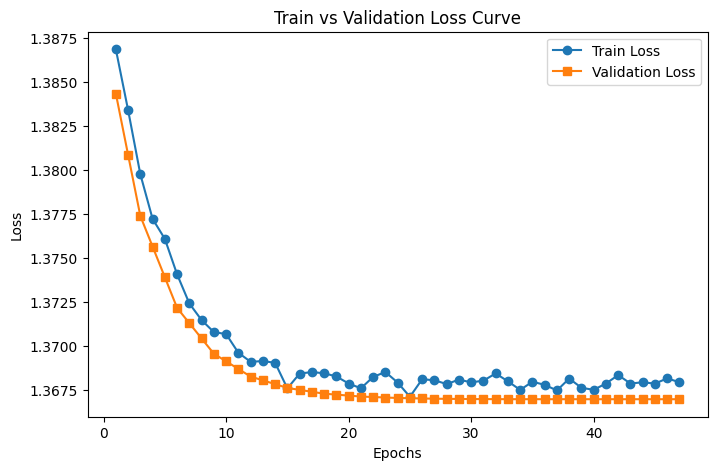

In [93]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from torch.utils.data import random_split, DataLoader, Dataset
import json
from transformers import AutoTokenizer, AutoModel

# Define HiMatchModel class
class HiMatchModel(nn.Module):
    def __init__(self, input_dim, label_dim, sub_label_dim):
        super(HiMatchModel, self).__init__()
        self.fc1 = nn.Linear(input_dim, 512)
        self.dropout = nn.Dropout(0.3)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(512, label_dim)
        self.fc3 = nn.Linear(512, sub_label_dim)
        self.sigmoid = nn.Sigmoid()
    
    def forward(self, x):
        x = self.fc1(x)
        x = self.dropout(x)
        x = self.relu(x)
        label_output = self.sigmoid(self.fc2(x))
        sub_label_output = self.sigmoid(self.fc3(x))
        return label_output, sub_label_output

# Load hierarchical labels
with open("narrative_classification_HIN/label_hierarchy.json", "r", encoding="utf-8") as f:
    label_hierarchy = json.load(f)

# Convert labels into an index-based format
label_to_index = {label: idx for idx, label in enumerate(label_hierarchy.keys())}
index_to_label = {idx: label for label, idx in label_to_index.items()}

# Convert sub-labels into indices
sub_label_to_index = {}
sub_label_counter = 0
for key, values in label_hierarchy.items():
    for value in values:
        if value not in sub_label_to_index:
            sub_label_to_index[value] = sub_label_counter
            sub_label_counter += 1

# Define HierarchicalDataset class
class HierarchicalDataset(Dataset):
    def __init__(self, data):
        self.data = data
    
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, idx):
        sample = self.data[idx]
        text_embedding = torch.tensor(sample['Encoded_Text'], dtype=torch.float32)
        labels = torch.zeros(len(label_to_index))
        sub_labels = torch.zeros(len(sub_label_to_index))
        
        for label in sample['Narrative']:
            if label in label_to_index:
                labels[label_to_index[label]] = 1
        
        for sub_label in sample['Sub_Narrative']:
            if sub_label in sub_label_to_index:
                sub_labels[sub_label_to_index[sub_label]] = 1
        
        return text_embedding, labels, sub_labels

# Load encoded text data
with open("narrative_classification_HIN/encoded_text_data.json", "r", encoding="utf-8") as f:
    encoded_data = json.load(f)

# Split dataset into training (90%) and validation (10%)
train_size = int(0.9 * len(encoded_data))
val_size = len(encoded_data) - train_size
train_data, val_data = random_split(encoded_data, [train_size, val_size])

# Create dataset and dataloader
train_dataset = HierarchicalDataset(train_data)
val_dataset = HierarchicalDataset(val_data)
train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=8, shuffle=False)

# Initialize Model
input_dim = 768  # Ensure correct embedding size for IndicBERT
label_dim = len(label_to_index)
sub_label_dim = len(sub_label_to_index)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = HiMatchModel(input_dim, label_dim, sub_label_dim).to(device)
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.000001, weight_decay=1e-4)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=3, gamma=0.5)

# Training Loop with Validation
train_losses = []
val_losses = []

def train_model(model, train_loader, val_loader, criterion, optimizer, scheduler, epochs=20):
    best_val_loss = float("inf")
    patience = 5
    patience_counter = 0
    
    for epoch in range(epochs):
        model.train()
        total_train_loss = 0
        
        for text_embedding, labels, sub_labels in train_loader:
            text_embedding, labels, sub_labels = text_embedding.to(device), labels.to(device), sub_labels.to(device)
            optimizer.zero_grad()
            label_output, sub_label_output = model(text_embedding)
            loss1 = criterion(label_output, labels)
            loss2 = criterion(sub_label_output, sub_labels)
            loss = loss1 + loss2
            loss.backward()
            optimizer.step()
            total_train_loss += loss.item()
        
        train_loss = total_train_loss / len(train_loader)
        train_losses.append(train_loss)
        
        # Validation Step
        model.eval()
        total_val_loss = 0
        with torch.no_grad():
            for text_embedding, labels, sub_labels in val_loader:
                text_embedding, labels, sub_labels = text_embedding.to(device), labels.to(device), sub_labels.to(device)
                label_output, sub_label_output = model(text_embedding)
                loss1 = criterion(label_output, labels)
                loss2 = criterion(sub_label_output, sub_labels)
                total_val_loss += (loss1 + loss2).item()
        
        val_loss = total_val_loss / len(val_loader)
        val_losses.append(val_loss)
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            patience_counter = 0  # Reset counter
        else:
            patience_counter += 1
        
        if patience_counter >= patience:
            print(f"Early stopping at epoch {epoch+1}")
            break
        
        scheduler.step()
        
        print(f"Epoch {epoch+1}, Train Loss: {train_loss}, Val Loss: {val_loss}")

# Train Model
train_model(model, train_loader, val_loader, criterion, optimizer, scheduler, epochs=50)

# Save Model
torch.save(model.state_dict(), "hindi_himatch_model.pth")
print("Model training completed and saved!")

# Plot Train vs Validation Loss
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(train_losses) + 1), train_losses, label='Train Loss', marker='o')
plt.plot(range(1, len(val_losses) + 1), val_losses, label='Validation Loss', marker='s')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Train vs Validation Loss Curve")
plt.legend()
plt.show()

In [96]:
import torch
import json
import os
import re
import numpy as np
from transformers import AutoTokenizer, AutoModel

# Load the trained model
input_dim = 768  # Ensure correct embedding size
model = HiMatchModel(input_dim, len(label_to_index), len(sub_label_to_index))
model.load_state_dict(torch.load("narrative_classification_HIN/hindi_himatch_model.pth", map_location=device))
model.to(device)
model.eval()

# Load tokenizer and model for text encoding
model_name = "ai4bharat/indic-bert"
tokenizer = AutoTokenizer.from_pretrained(model_name)
bert_model = AutoModel.from_pretrained(model_name)
bert_model.to(device)


# Function to encode Hindi text using IndicBERT
def encode_text(text):
    inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True, max_length=512).to(device)
    with torch.no_grad():
        outputs = bert_model(**inputs)
    return outputs.last_hidden_state.mean(dim=1).tolist()[0]

# Function to normalize probabilities
def normalize_probs(probs):
    min_val, max_val = torch.min(probs), torch.max(probs)
    return (probs - min_val) / (max_val - min_val + 1e-6)  # Avoid division by zero

# Function to determine threshold dynamically using percentile
def dynamic_threshold(probs, percentile=80):
    threshold_value = np.percentile(probs.cpu().numpy(), percentile)
    return max(threshold_value, 0.2)  # Ensure a minimum threshold

# Load new text files and preprocess them
unseen_texts_folder = "narrative_classification_HIN/narrative_classification/test_data/hin"
output_file = "subtasked_2_annotation_new.txt"
predictions = []

for file in os.listdir(unseen_texts_folder):
    if file.endswith(".txt"):
        with open(os.path.join(unseen_texts_folder, file), "r", encoding="utf-8") as f:
            text = f.read()
            cleaned_text = clean_text(text)
            encoded_text = encode_text(cleaned_text)
            encoded_tensor = torch.tensor(encoded_text, dtype=torch.float32).to(device)
            
            # Predict labels
            with torch.no_grad():
                label_output, sub_label_output = model(encoded_tensor.unsqueeze(0))
            
            # Normalize probabilities
            label_output = normalize_probs(label_output.squeeze())
            sub_label_output = normalize_probs(sub_label_output.squeeze())
            
            # Determine dynamic threshold using percentile
            label_threshold = dynamic_threshold(label_output, percentile=85)
            sub_label_threshold = dynamic_threshold(sub_label_output, percentile=85)
            
            # Thresholding to decide labels
            label_indices = (label_output > label_threshold).nonzero(as_tuple=True)[0].tolist()
            sub_label_indices = (sub_label_output > sub_label_threshold).nonzero(as_tuple=True)[0].tolist()
            
            predicted_labels = [list(label_to_index.keys())[i] for i in label_indices]
            predicted_sub_labels = [list(sub_label_to_index.keys())[i] for i in sub_label_indices]
            
            # Ensure diversity in predictions
            if len(set(predicted_labels)) <= 2:
                print(f"⚠️ WARNING: {file} has only {predicted_labels}. Model might be biased!")
            
            # Handle 'Other' case
            if "Other" in predicted_labels:
                predicted_sub_labels = ["Other"]
            
            # Logging the probabilities for debugging
            print(f"File: {file}")
            print(f"Label Probabilities: {label_output.tolist()}")
            print(f"Sub-Label Probabilities: {sub_label_output.tolist()}")
            print(f"Selected Labels: {predicted_labels}")
            print(f"Selected Sub-Labels: {predicted_sub_labels}\n------")
            
            predictions.append(f"{file}\t{';'.join(predicted_labels)}\t{';'.join(predicted_sub_labels)}")

# Save predictions to output file
with open(output_file, "w", encoding="utf-8") as f:
    f.write("\n".join(predictions))

print(f"Predictions saved to {output_file}!")

File: HI_97.txt
Label Probabilities: [0.6581107378005981, 0.9948859214782715, 0.05670826882123947, 0.823702871799469, 0.432192862033844, 0.5037983059883118, 0.7179161310195923, 0.19372648000717163, 0.9549329876899719, 0.3482860028743744, 0.999821126461029, 0.6369045972824097, 0.33962833881378174, 0.19118168950080872, 0.9999827742576599, 0.6803025603294373, 0.6276920437812805, 0.5964626669883728, 0.0, 0.7547863721847534, 0.7423948645591736, 0.4728236794471741]
Sub-Label Probabilities: [0.5020912289619446, 0.5071869492530823, 0.808516800403595, 0.4744255542755127, 0.4050970673561096, 0.24751169979572296, 0.5035234093666077, 0.15222512185573578, 0.5605723857879639, 0.287297785282135, 0.7746335864067078, 0.637791633605957, 0.2664245665073395, 0.4807306230068207, 0.3516629636287689, 0.3688509166240692, 0.8645880818367004, 0.7738772630691528, 0.4034135639667511, 0.5099338889122009, 0.4128810167312622, 0.6503612399101257, 0.6383805871009827, 0.2673896253108978, 0.43899473547935486, 0.31889742

# 5. Evaluate Predictions (Gold Label)

In [99]:
import pandas as pd
from sklearn.metrics import precision_recall_fscore_support

def load_annotations(file_path):
    """Loads annotations from a text file into a DataFrame."""
    data = []
    with open(file_path, 'r', encoding='utf-8') as f:
        for line in f:
            parts = line.strip().split('\t')
            if len(parts) == 3:
                file_id, narratives, sub_narratives = parts
                data.append((file_id, narratives.split(';'), sub_narratives.split(';')))
    return pd.DataFrame(data, columns=['File', 'Narratives', 'Sub-Narratives'])

# Load ground truth and predicted annotations
ground_truth_file = "narrative_classification_HIN/narrative_classification/gold_label/hin/subtask-2-annotations.txt"
predictions_file = "narrative_classification_HIN/subtasked_2_annotation_new.txt"
gt_df = load_annotations(ground_truth_file)
pred_df = load_annotations(predictions_file)

# Merge data on File ID
merged_df = gt_df.merge(pred_df, on='File', suffixes=('_true', '_pred'))

def compute_metrics(true_labels, pred_labels):
    """Computes precision, recall, and F1-score for multi-label classification."""
    all_labels = list(set(label for labels in true_labels for label in labels))
    y_true = [[1 if label in labels else 0 for label in all_labels] for labels in true_labels]
    y_pred = [[1 if label in labels else 0 for label in all_labels] for labels in pred_labels]
    precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred, average='macro', zero_division=0)
    return precision, recall, f1

# Compute metrics for Narratives
narrative_precision, narrative_recall, narrative_f1 = compute_metrics(merged_df['Narratives_true'], merged_df['Narratives_pred'])
sub_precision, sub_recall, sub_f1 = compute_metrics(merged_df['Sub-Narratives_true'], merged_df['Sub-Narratives_pred'])

# Print Evaluation Results
print("\nModel Evaluation Results:")
print(f"Narrative-Level Precision: {narrative_precision:.4f}, Recall: {narrative_recall:.4f}, F1-score: {narrative_f1:.4f}")
print(f"Sub-Narrative-Level Precision: {sub_precision:.4f}, Recall: {sub_recall:.4f}, F1-score: {sub_f1:.4f}")


Model Evaluation Results:
Narrative-Level Precision: 0.0577, Recall: 0.3173, F1-score: 0.0795
Sub-Narrative-Level Precision: 0.0079, Recall: 0.1471, F1-score: 0.0148


In [98]:
import torch
import json
import pandas as pd
from sklearn.metrics import classification_report

# Load predicted labels
predictions_file = "narrative_classification_HIN/subtasked_2_annotation_new.txt"
predictions = {}

with open(predictions_file, "r", encoding="utf-8") as f:
    for line in f:
        parts = line.strip().split("\t")
        if len(parts) == 3:
            file_name, pred_labels, pred_sub_labels = parts
            predictions[file_name] = {
                "narratives": set(pred_labels.split(";")),
                "sub_narratives": set(pred_sub_labels.split(";"))
            }

# Load gold labels
gold_labels_file = "narrative_classification_HIN/narrative_classification/gold_label/hin/subtask-2-annotations.txt"
gold_labels = {}

with open(gold_labels_file, "r", encoding="utf-8") as f:
    for line in f:
        parts = line.strip().split("\t")
        if len(parts) == 3:
            file_name, true_labels, true_sub_labels = parts
            gold_labels[file_name] = {
                "narratives": set(true_labels.split(";")),
                "sub_narratives": set(true_sub_labels.split(";"))
            }

# Convert to multi-label binary format
all_labels = sorted(set(label for data in gold_labels.values() for label in data["narratives"]))
all_sub_labels = sorted(set(label for data in gold_labels.values() for label in data["sub_narratives"]))

label_index = {label: i for i, label in enumerate(all_labels)}
sub_label_index = {label: i for i, label in enumerate(all_sub_labels)}

def convert_to_binary_vectors(data, label_index):
    binary_vectors = []
    for file, values in data.items():
        vector = [0] * len(label_index)
        for label in values:
            if label in label_index:
                vector[label_index[label]] = 1
        binary_vectors.append(vector)
    return binary_vectors

y_true = convert_to_binary_vectors({k: v["narratives"] for k, v in gold_labels.items()}, label_index)
y_pred = convert_to_binary_vectors({k: v["narratives"] for k, v in predictions.items()}, label_index)

y_true_sub = convert_to_binary_vectors({k: v["sub_narratives"] for k, v in gold_labels.items()}, sub_label_index)
y_pred_sub = convert_to_binary_vectors({k: v["sub_narratives"] for k, v in predictions.items()}, sub_label_index)

# Evaluate narratives
print("Narrative Classification Report:")
print(classification_report(y_true, y_pred, target_names=all_labels, zero_division=0))

# Evaluate sub-narratives
print("\nSub-Narrative Classification Report:")
print(classification_report(y_true_sub, y_pred_sub, target_names=all_sub_labels, zero_division=0))

Narrative Classification Report:
                                                        precision    recall  f1-score   support

                          CC: Amplifying Climate Fears       0.14      1.00      0.24         4
                                                 Other       0.00      0.00      0.00         2
                     URW: Amplifying war-related fears       0.25      0.12      0.17         8
URW: Blaming the war on others rather than the invader       0.00      0.00      0.00         5
                             URW: Discrediting Ukraine       0.09      1.00      0.16         3
                 URW: Discrediting the West, Diplomacy       0.22      1.00      0.36         7
                           URW: Distrust towards Media       0.00      0.00      0.00         2
URW: Hidden plots by secret schemes of powerful groups       0.06      1.00      0.11         2
               URW: Negative Consequences for the West       0.00      0.00      0.00         3
      